<a href="https://colab.research.google.com/github/Jeremy-22/Red-Neuronal/blob/RED-SECUENCIAL/RED_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pip install -q mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [5]:
import mlflow
mlflow.tensorflow.autolog()

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Adamax
from tensorflow.keras.layers import Dense, Activation

In [13]:
dataset= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [14]:
(x_train, y_train), (x_test, y_test) = dataset

In [17]:
x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype("float32")
x_testv = x_testv.astype("float32")
x_trainv /= 255
x_testv /= 255

In [18]:
num_class=10
y_trainc = keras.utils.to_categorical(y_train, num_class)
y_testc = keras.utils.to_categorical(y_test, num_class)

In [21]:
model = Sequential()
model.add(Dense(800, activation="sigmoid", input_shape=(784,)))
model.add(Dense(400, activation="sigmoid"))
model.add(Dense(200, activation="relu"))
model.add(Dense(50, activation="gelu"))
model.add(Dense(10, activation="softmax"))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [29]:
history = model.fit(x_trainv, y_trainc,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

2024/02/15 06:59:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1cbe555b45864ad39173161fc8e4e157', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
6000/6000 [==============================] - 80s 13ms/step - loss: 0.3767 - accuracy: 0.8826 - val_loss: 0.1902 - val_accuracy: 0.9458
Epoch 2/10
6000/6000 [==============================] - 106s 18ms/step - loss: 0.1970 - accuracy: 0.9486 - val_loss: 0.1803 - val_accuracy: 0.9561
Epoch 3/10
6000/6000 [==============================] - 70s 12ms/step - loss: 0.1742 - accuracy: 0.9586 - val_loss: 0.1941 - val_accuracy: 0.9563
Epoch 4/10
6000/6000 [==============================] - 72s 12ms/step - loss: 0.1567 - accuracy: 0.9650 - val_loss: 0.1932 - val_accuracy: 0.9591
Epoch 5/10
6000/6000 [==============================] - 79s 13ms/step - loss: 0.1421 - accuracy: 0.9694 - val_loss: 0.2593 - val_accuracy: 0.9549
Epoch 6/10
6000/6000 [==============================] - 75s 12ms/step - loss: 0.1388 - accuracy: 0.9716 - val_loss: 0.1727 - val_accuracy: 0.9725
Epoch 7/10
6000/6000 [==============================] - 73s 12ms/step - loss: 0.1293 - accuracy: 0.9738 - val_loss: 0.2741 

2024/02/15 07:14:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [30]:
import matplotlib.pyplot as plt

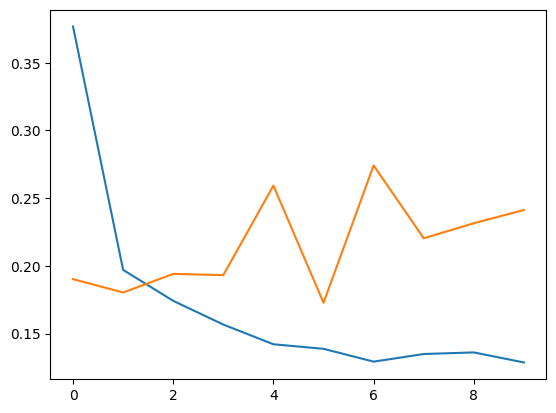

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [32]:
model.save('model_exp1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
model2 = Sequential()
model2.add(Dense(400, activation='sigmoid', input_shape=(784,)))
model2.add(Dense(200, activation='tanh'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(50, activation='leaky_relu'))
model2.add(Dense(10, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [44]:
history = model.fit(x_trainv, y_trainc,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

2024/02/15 07:18:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1e684a9ceb8c42f98803b3ecc26523a5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
600/600 [==============================] - 15s 24ms/step - loss: 0.2164 - accuracy: 0.5222 - val_loss: 0.1386 - val_accuracy: 0.7648
Epoch 2/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0960 - accuracy: 0.8598 - val_loss: 0.0729 - val_accuracy: 0.8932
Epoch 3/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0516 - accuracy: 0.9789 - val_loss: 0.0513 - val_accuracy: 0.9746
Epoch 4/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0283 - accuracy: 0.9885 - val_loss: 0.0304 - val_accuracy: 0.9781
Epoch 5/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0114 - accuracy: 0.9917 - val_loss: 0.0241 - val_accuracy: 0.9821
Epoch 6/10
600/600 [==============================] - 23s 39ms/step - loss: 0.0075 - accuracy: 0.9931 - val_loss: 0.0261 - val_accuracy: 0.9784
Epoch 7/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0058 - accuracy: 0.9941 - val_loss: 0.0283 - val_accuracy:

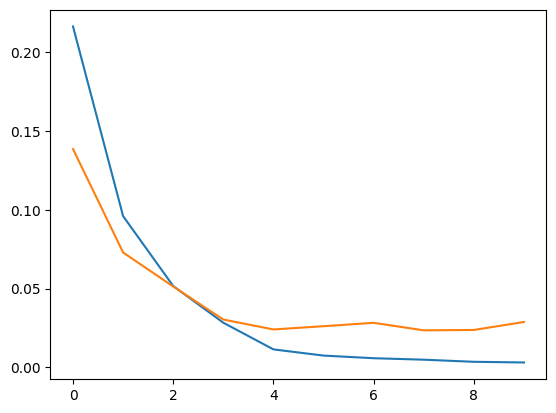

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [63]:
model2.save('model_exp2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
model3 = Sequential()
model.add(Dense(600, activation='tanh', input_shape=(784,)))
model3.add(Dense(200, activation='sigmoid'))
model3.add(Dense(100, activation='leaky_relu'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(10, activation='softmax'))

In [69]:
model3.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [70]:
history = model3.fit(x_trainv, y_trainc,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

2024/02/15 07:33:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '45ec42ea6000406490dd1249b0dba2ec', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0952 - accuracy: 0.8572 - val_loss: 0.0560 - val_accuracy: 0.9127
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0502 - accuracy: 0.9199 - val_loss: 0.0415 - val_accuracy: 0.9323
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0385 - accuracy: 0.9377 - val_loss: 0.0353 - val_accuracy: 0.9444
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0315 - accuracy: 0.9494 - val_loss: 0.0299 - val_accuracy: 0.9522
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0266 - accuracy: 0.9571 - val_loss: 0.0256 - val_accuracy: 0.9577
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0228 - accuracy: 0.9631 - val_loss: 0.0221 - val_accuracy: 0.9643
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0199 - accuracy: 0.9684 - val_loss: 0.0202 - val_accuracy: 0.9668
Epoch 

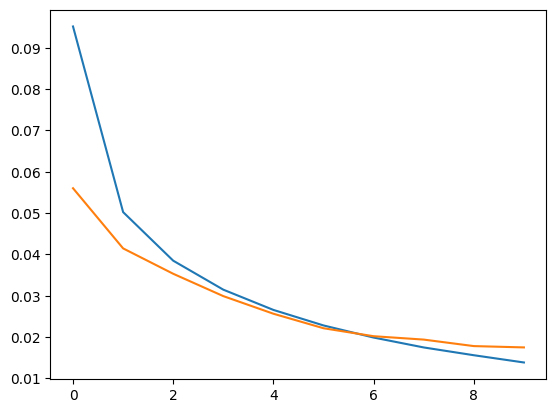

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [72]:
model3.save('model_exp3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
